# RAMP: Unveiling Energy Landscapes: Exploring Energy Performance Diagnosis (DPE) in Paris Before July 2021
*AGUDELO Julian, BAROUDI Malek,KASSARA Nada, PONCE Afonso, ROUSSEAU Paul, VERLYNDE Matthieu*
<div>
    <table style="width:100%; background-color:transparent;">
        <tr style="background-color:transparent;">
            <td align="left" style="background-color:transparent; width: 40%;">
                <a href="https://www.agroparistech.fr/">
                    <img src="https://www.aptalumni.org/images/news/apt-logo-sloganfranc-ais-rvb-positif-002.png" alt="Texte alternatif" width="450px" />
                </a>
            </td>
            <td align="right" style="background-color:transparent; width: 40%;">
                <a href="https://www.geops.universite-paris-saclay.fr/">
                    <img src="https://i.pinimg.com/originals/4c/60/61/4c6061817fe38c9cf17cd55c4f9e1a55.png" alt="Texte alternatif" width="450px" />
                </a>
            </td>
        </tr>
    </table>
</div>



## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Requirements](#requirements)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)


## Introduction to the Energy Performance Diagnosis (DPE) - Paris (Before July 2021)<a class="anchor" id="introduction"></a>

The Energy Performance Diagnosis (DPE) serves as a comprehensive tool for assessing the energy performance of residences and buildings, providing insights into their energy consumption and environmental impact in terms of greenhouse gas emissions.

The establishment of DPE is subject to regulated content and procedures. This diagnostic meticulously outlines the characteristics of the building or dwelling, encompassing details such as surface area, orientation, walls, windows, materials, and more. Additionally, it encompasses an evaluation of heating systems, hot water production, cooling, and ventilation equipment. Depending on the scenario, the DPE indicates either the actual energy consumption based on invoices or the estimated energy consumption for standardized usage of the building or dwelling.

Facilitating the interpretation of DPE information are two labels, each classified into seven classes ranging from A to G, where A represents the highest performance and G the lowest:

1. **Energy Label:** Provides insights into primary energy consumption.
2. **Climate Label:** Reveals the quantity of greenhouse gases emitted.

Crucially, the Diagnostic de Performance Énergétique must be conducted by an independent professional meeting specific competency criteria and holding adequate insurance. This regulatory framework ensures the reliability and accuracy of the assessment.

By delving into the DPE of residences in Paris, specifically before July 2021, we gain a nuanced understanding of the energy landscape in this dynamic urban environment. This introduction sets the stage for exploring the implications and applications of DPE data in enhancing energy efficiency and sustainability practices within the context of the vibrant city of Paris.

## The dataset <a class="anchor" id="dataset"></a>

desciprption of the dataset *****

## Requirements <a class="anchor" id="requirements"></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Uncomment the following line to download data:
#!python download_data.py

## Data Exploration <a class="anchor" id="exploration"></a>

### Training data 

In [18]:
data = pd.read_csv('C:/Users/HP/Downloads/td001_dpe-clean/td001_dpe-clean.csv')
df = pd.DataFrame(data)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_18868\2438815905.py:1: DtypeWarning: Columns (8,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/HP/Downloads/td001_dpe-clean/td001_dpe-clean.csv')


,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,surface_baies_orientees_sud,surface_planchers_hauts_deperditifs,surface_planchers_bas_deperditifs,surface_parois_verticales_opaques_deperditives,etat_avancement,organisme_certificateur,adresse_organisme_certificateur,dpe_vierge,est_efface,date_reception_dpe
0,176,1375V2000001D,2159,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-10,...,0.0,0.0,0.0,0.00,1,DEKRA Certification,3/5 avenue Garlande 92220 BAGNEUX (détail sur ...,0.0,0,2013-04-11 04:00:00
1,219,1375V2000003F,2360,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-09,...,0.0,0.0,0.0,0.00,1,Bureau Veritas Certification - 60 avenue du Gé...,Le Guillaumet 92046 PARIS LA DEFENSE CEDEX (dé...,0.0,0,2013-04-12 04:00:00
2,220,1375V2000004G,2360,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-10,...,0.0,0.0,0.0,0.00,1,Bureau Veritas Certification - 60 avenue du Gé...,Le Guillaumet 92046 PARIS LA DEFENSE CEDEX (dé...,0.0,0,2013-04-12 04:00:00
3,248,1375V2000008K,1698,5,2,FACTURE,VERSION_2012,NaN,NaN,2013-04-04,...,0.0,0.0,0.0,0.00,1,I.Cert,parc EDONIA - bâtiment G - rue de la terre Vic...,0.0,0,2013-04-12 04:00:00
4,250,1375V2000009L,2360,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-11,...,0.0,0.0,0.0,0.00,1,Bureau Veritas Certification - 60 avenue du Gé...,Le Guillaumet 92046 PARIS LA DEFENSE CEDEX (dé...,0.0,0,2013-04-12 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298144,9431398,2075N1000360A,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:56:50
298145,9431399,2075N1000361B,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:56:58
298146,9431400,2075N1000362C,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:57:06
298147,9431403,2075N1000363D,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:57:15


<Axes: >

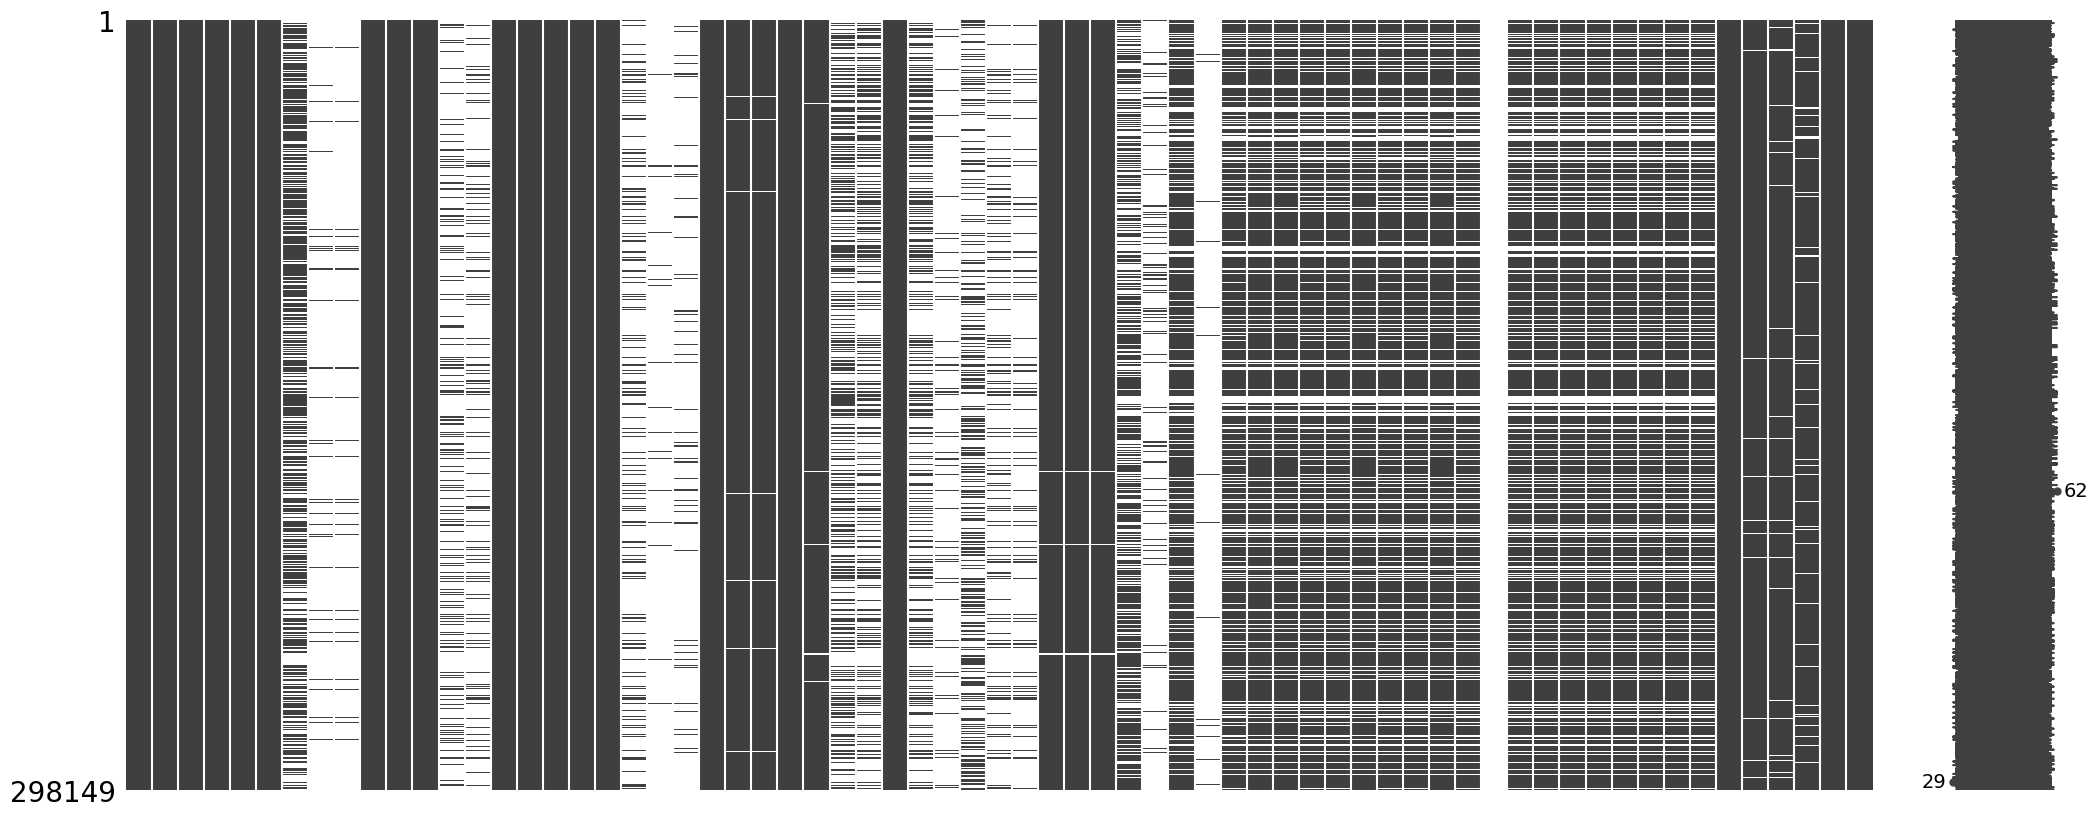

In [19]:
# Missingness
msno.matrix(df)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298149 entries, 0 to 298148
Data columns (total 67 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              298149 non-null  int64  
 1   numero_dpe                                      298149 non-null  object 
 2   usr_diagnostiqueur_id                           298149 non-null  int64  
 3   usr_logiciel_id                                 298149 non-null  int64  
 4   tr001_modele_dpe_id                             298149 non-null  int64  
 5   nom_methode_dpe                                 298149 non-null  object 
 6   version_methode_dpe                             185134 non-null  object 
 7   nom_methode_etude_thermique                     13728 non-null   object 
 8   version_methode_etude_thermique                 12447 non-null   object 
 9   date_visite_diagnostiqueur

In [21]:
print(df.isnull().sum())

id                                     0
numero_dpe                             0
usr_diagnostiqueur_id                  0
usr_logiciel_id                        0
tr001_modele_dpe_id                    0
                                   ...  
organisme_certificateur             2841
adresse_organisme_certificateur    11355
dpe_vierge                         16937
est_efface                             0
date_reception_dpe                     0
Length: 67, dtype: int64


In [22]:
missing_values_by_row = df.isnull().sum(axis=1)
missing_values_by_row

0         17
1         15
2         16
3         17
4         16
          ..
298144    34
298145    34
298146    34
298147    34
298148    16
Length: 298149, dtype: int64

## Labels
The target variable is in the column classe_consommation_energie since we classify energy performance.

In [23]:
df.classe_consommation_energie.unique().shape, df.classe_consommation_energie.unique()

((9,), array(['E', 'G', 'F', 'D', 'N', 'A', 'C', 'B', 'H'], dtype=object))

There are 9 events to classify examples from.

classe_consommation_energie
N    92560
D    59110
E    55487
F    25567
C    22790
A    14494
B    14127
G    14013
H        1
Name: count, dtype: int64

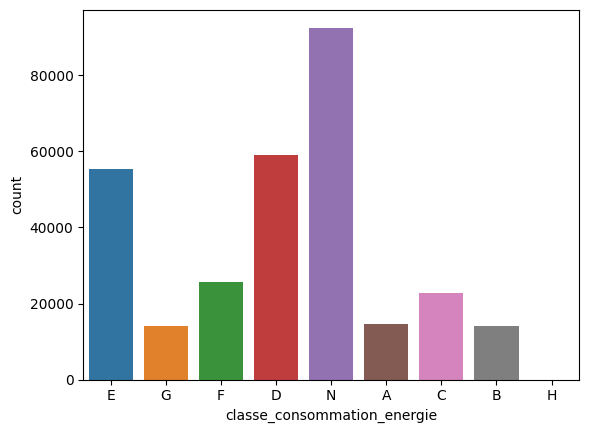

In [24]:
sns.countplot(x='classe_consommation_energie',hue='classe_consommation_energie',data = df)
df['classe_consommation_energie'].value_counts()

You can see that we deal with an imbalanced dataset, where some classes have  almost 4 times more observations than others. 

In [25]:
df.describe()

,id,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,consommation_energie,estimation_ges,tr002_type_batiment_id,tr012_categorie_erp_id,tr013_type_erp_id,annee_construction,...,nombre_entrees_sans_sas,surface_baies_orientees_nord,surface_baies_orientees_est_ouest,surface_baies_orientees_sud,surface_planchers_hauts_deperditifs,surface_planchers_bas_deperditifs,surface_parois_verticales_opaques_deperditives,etat_avancement,dpe_vierge,est_efface
count,2.981490e+05,298149.000000,298149.000000,298149.000000,2.981490e+05,298149.000000,298149.000000,6767.000000,25679.000000,298149.000000,...,231748.000000,232106.000000,232106.000000,232106.000000,232106.00000,232106.000000,232106.000000,298149.0,281212.000000,298149.0
mean,4.220424e+06,9961.519482,5.780573,5.608545,1.993569e+02,26.498482,2.223251,2.702675,18.770085,1903.619378,...,0.000043,1.526707,2.174904,1.534249,12.50352,12.605720,16.740017,1.0,0.349740,0.0
std,2.672787e+06,5342.890825,3.842734,4.429324,6.598350e+03,1520.304753,0.658307,1.890741,7.683854,322.664569,...,0.007772,21.264331,33.280133,23.461626,69.66437,87.985748,192.481539,0.0,0.476889,0.0
min,1.760000e+02,1.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-140.330000,1.0,0.000000,0.0
25%,1.882276e+06,5724.000000,3.000000,2.000000,0.000000e+00,0.000000,2.000000,1.000000,12.000000,1947.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0
50%,4.062849e+06,9952.000000,3.000000,2.000000,1.629700e+02,11.900000,2.000000,1.000000,23.000000,1947.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0
75%,6.368484e+06,14223.000000,10.000000,10.000000,2.700000e+02,36.120000,2.000000,5.000000,23.000000,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,1.000000,0.0
max,9.431414e+06,22627.000000,16.000000,24.000000,3.110395e+06,727825.460000,5.000000,5.000000,30.000000,32767.000000,...,2.000000,3708.000000,4510.660000,1758.000000,8885.00000,17075.000000,51090.000000,1.0,1.000000,0.0


### Sample groups

In [26]:
# Distribution of groups in each class
group_class_counts = df.groupby(['classe_consommation_energie', 'id']).size().unstack(fill_value=0)
group_class_counts

id,176,219,220,248,250,328,357,377,856,877,...,9431353,9431392,9431394,9431395,9431396,9431398,9431399,9431400,9431403,9431414
classe_consommation_energie,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,0
B,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
F,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N,0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0


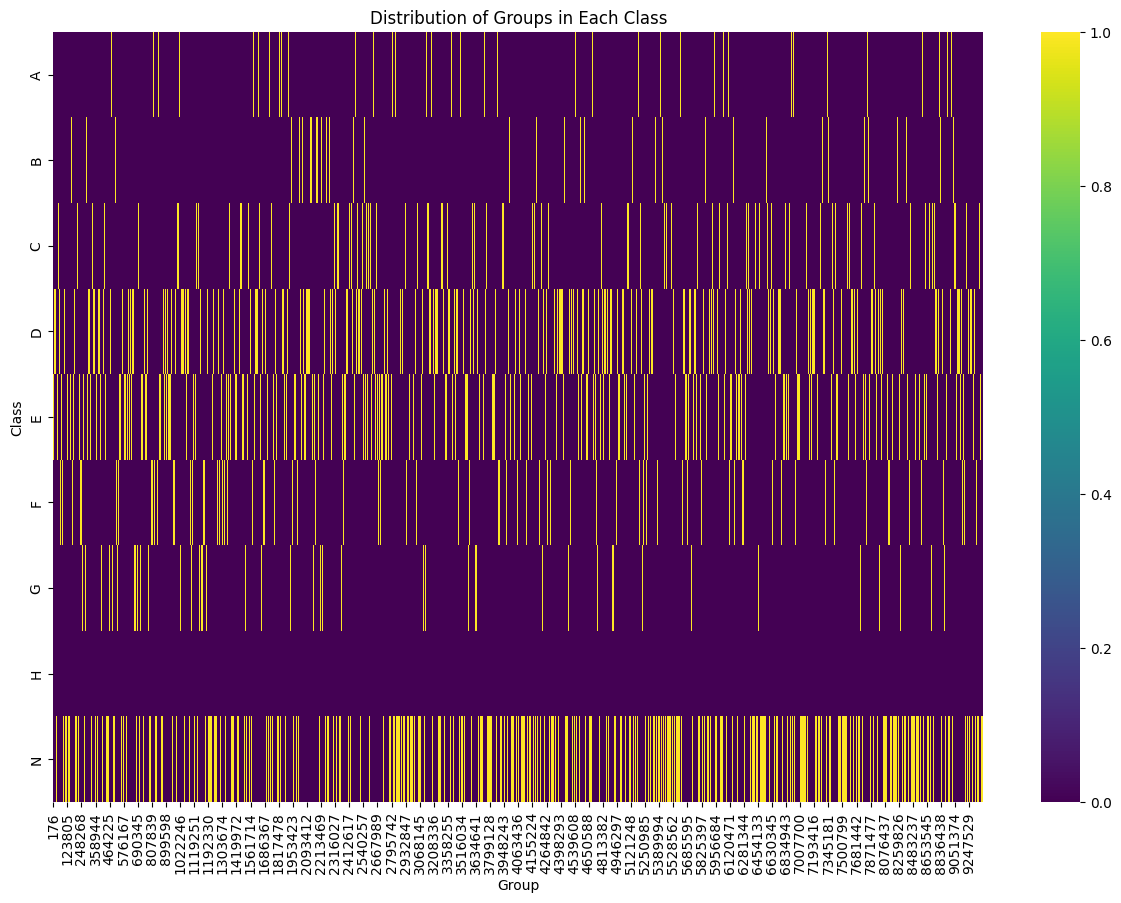

In [27]:
# heatmap of the distribution of groups in each class
plt.figure(figsize=(15, 10))
sns.heatmap(group_class_counts, cmap="viridis")
plt.title('Distribution of Groups in Each Class')
plt.xlabel('Group')
plt.ylabel('Class')
plt.show()